## Imports

## Prepare data

In [14]:
from database import PropertyBuy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

data = PropertyBuy.to_df()
#data = data[data['city'] == 'pretoria']

ModuleNotFoundError: No module named 'database'

## Cleaning

In [83]:
data.loc[data['bedroom_count'] == 1.5, 'bedroom_count'] = 1
data.loc[data['bedroom_count'] == 2.5, 'bedroom_count'] = 2
data.loc[data['bedroom_count'] == 3.5, 'bedroom_count'] = 3
unpriced = data[data['price'].isna()]
priced = data.dropna(subset=['price'])
priced['price/room'] = priced['price'] / priced['bedroom_count']

plot_data = priced
plot_data

<ipython-input-83-96096313346b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priced['price/room'] = priced['price'] / priced['bedroom_count']


,id,title,price,suburb,bedroom_count,href,created_at,updated_at,site,province,city,region,bathroom_count,price/room
21,pp_6550816,2 Bed Townhouse in Equestria,1150000.0,Equestria,2.0,/for-sale/gauteng/pretoria/pretoria-east/equestria/T2724086,2020-08-09 13:07:41.036637+00:00,2020-08-09 13:08:28.363109+00:00,https://www.privateproperty.co.za/,gauteng,pretoria,pretoria-east,NaN,575000.000000
22,pp_5320249,4 Bed Townhouse in Equestria,1650000.0,Equestria,4.0,/for-sale/gauteng/pretoria/pretoria-east/equestria/010-matroosberg/105-vlottenburg-street/T2120683,2020-08-09 13:07:41.035285+00:00,2020-08-09 13:08:28.361905+00:00,https://www.privateproperty.co.za/,gauteng,pretoria,pretoria-east,NaN,412500.000000
23,pp_6143728,5 Bed House in Faerie Glen,2095000.0,Faerie Glen,5.0,/for-sale/gauteng/pretoria/pretoria-east/faerie-glen/497-oregon/T2531460,2020-08-09 13:07:41.035800+00:00,2020-08-09 13:08:28.362310+00:00,https://www.privateproperty.co.za/,gauteng,pretoria,pretoria-east,NaN,419000.000000
24,pp_5814571,5 Bed House in Murrayfield,2490000.0,Murrayfield,5.0,/for-sale/gauteng/pretoria/pretoria-east/murrayfield/203-brenda/T2368522,2020-08-09 13:07:41.036244+00:00,2020-08-09 13:08:28.362718+00:00,https://www.privateproperty.co.za/,gauteng,pretoria,pretoria-east,NaN,498000.000000
25,pp_6160088,3 Bed Townhouse in Equestria,1490000.0,Equestria,3.0,/for-sale/gauteng/pretoria/pretoria-east/equestria/T2539804,2020-08-09 13:07:41.037018+00:00,2020-08-09 13:08:28.363496+00:00,https://www.privateproperty.co.za/,gauteng,pretoria,pretoria-east,NaN,496666.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,pp_5892868,3 Bed Apartment in La Montagne,650000.0,La Montagne,3.0,/for-sale/gauteng/pretoria/pretoria-east/la-montagne/T2407730,2020-08-09 13:11:14.574624+00:00,2020-08-09 13:11:14.574625+00:00,https://www.privateproperty.co.za/,gauteng,pretoria,pretoria-east,NaN,216666.666667
2936,pp_1016013,3 Bed Townhouse in Weavind Park,850000.0,Weavind Park,3.0,/for-sale/gauteng/pretoria/pretoria-east/weavind-park/S562689,2020-08-09 13:11:14.574945+00:00,2020-08-09 13:11:14.574946+00:00,https://www.privateproperty.co.za/,gauteng,pretoria,pretoria-east,NaN,283333.333333
2937,pp_6634879,2 Bed Townhouse in Die Wilgers,980000.0,Die Wilgers,2.0,/for-sale/gauteng/pretoria/pretoria-east/die-wilgers/T2766680,2020-08-09 13:11:14.575301+00:00,2020-08-09 13:11:14.575302+00:00,https://www.privateproperty.co.za/,gauteng,pretoria,pretoria-east,NaN,490000.000000
2938,pp_6819943,3 Bed House in Olympus AH,1400000.0,Olympus,3.0,/for-sale/gauteng/pretoria/pretoria-east/olympus/T2847082,2020-08-09 13:11:15.625549+00:00,2020-08-09 13:11:15.625555+00:00,https://www.privateproperty.co.za/,gauteng,pretoria,pretoria-east,NaN,466666.666667


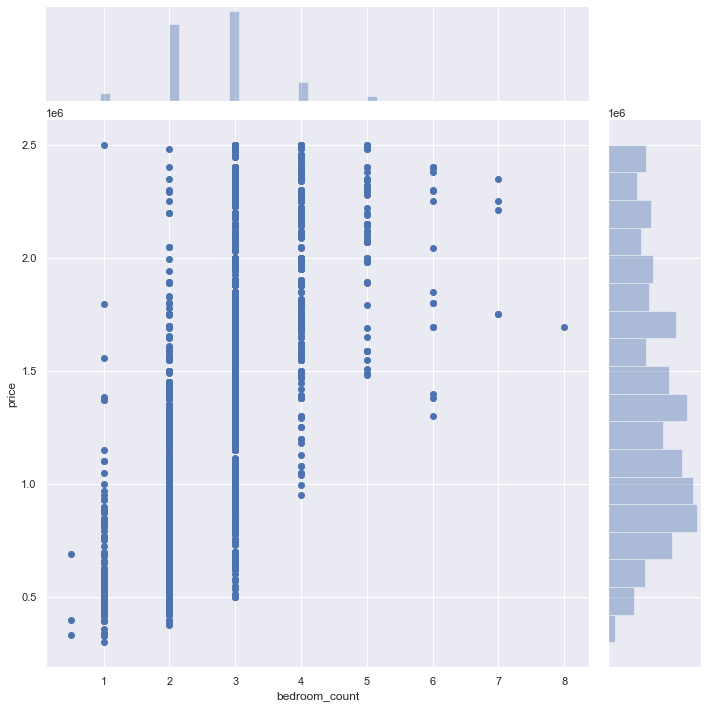

In [84]:
sns.jointplot(x='bedroom_count', y='price', data=plot_data, height=(10))
plt.show()

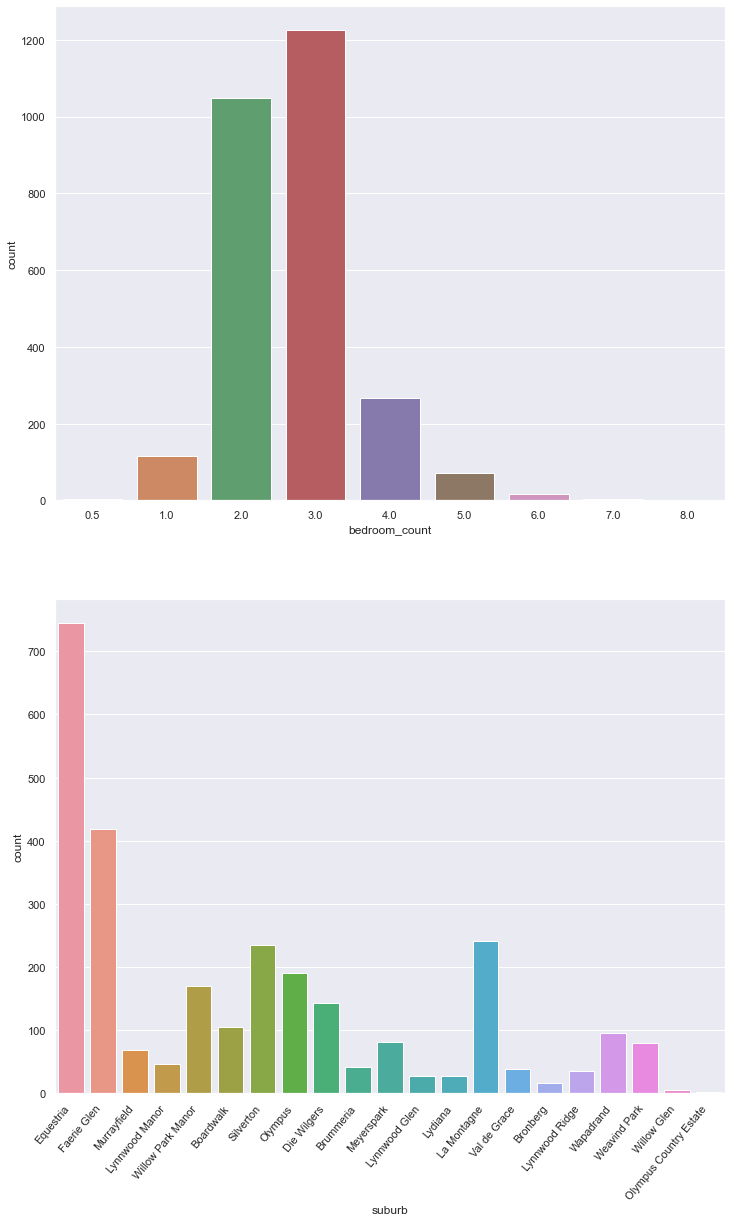

In [85]:
fig, ax =plt.subplots(2,1, figsize=(12,20))
sns.countplot(plot_data['bedroom_count'], ax=ax[0])
sns.countplot(plot_data['suburb'], ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=50, ha="right")
plt.show()

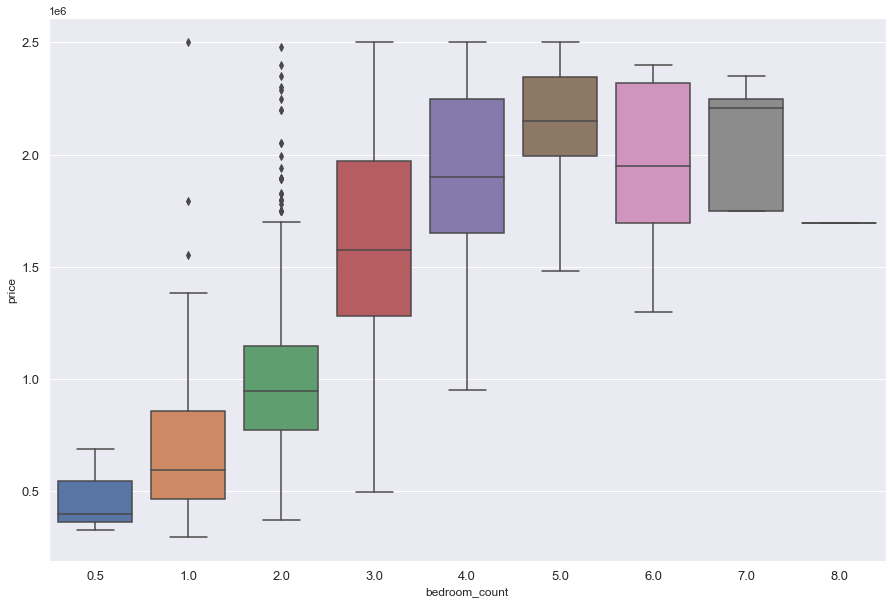

In [86]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x='bedroom_count', y='price', data = plot_data)
ax.tick_params(labelsize=13)
plt.show()

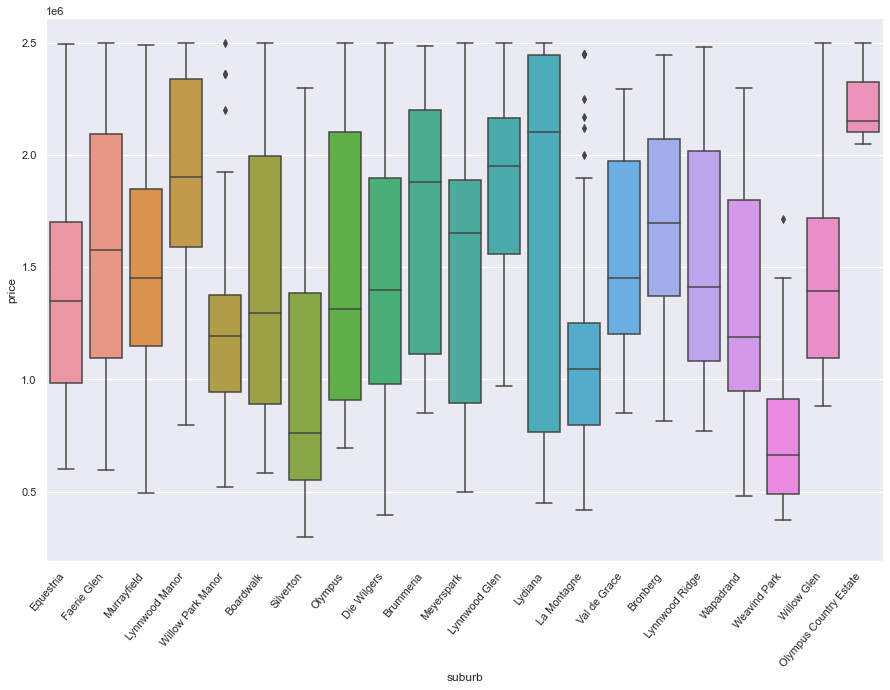

In [87]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x='suburb', y='price', data = plot_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

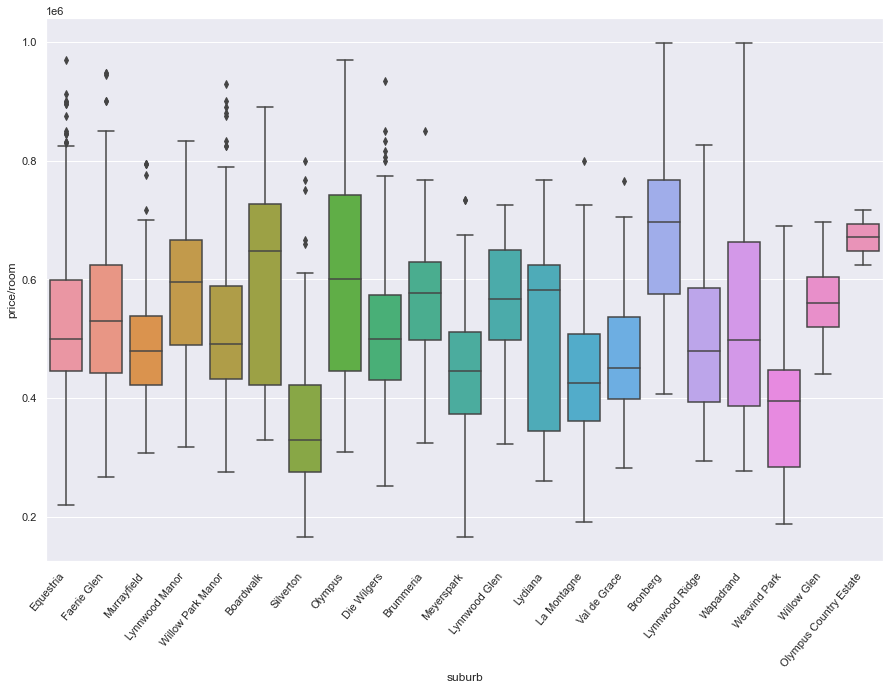

In [88]:
suburbs = ['Observatory', 'Woodstock', 'Zonnebloem', 'Gardens', 'Cape Town City Centre', 'Oranjezicht', 'Vredehoek', 'Walmer Estate', 'Salt River', 'De Waterkant', 'Tamboerskloof', 'Bo Kaap']
plot_suburbs = plot_data.loc[plot_data['suburb'].isin(suburbs)].dropna()
plot_suburbs = plot_data[plot_data['price/room'] < 1000000]

plt.figure(figsize=(15,10))
ax = sns.boxplot(x='suburb', y='price/room', data = plot_suburbs)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

In [89]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
str(plot_data[plot_data['price/room'] > 1700000]['href'].astype(str))

'2404       /for-sale/gauteng/pretoria/pretoria-east/meyerspark/T2835503\n2631    /for-sale/gauteng/pretoria/pretoria-east/lynnwood-glen/T2191077\nName: href, dtype: object'

In [90]:
plot_data = plot_data[(plot_data['bedroom_count']<=3) & 
                        (plot_data['bedroom_count']>1) & 
                       (plot_data['price']<=1000000)]
plot_data.shape

(798, 14)

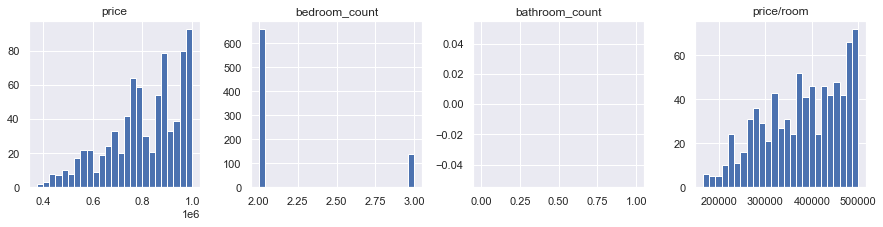

In [91]:
ax_list = plot_data.hist(bins=25, layout=(4,4), figsize=(15,15))

In [1]:
# Test Cleaning

In [2]:
import pandas as pd
import numpy as np
import pytest

data_records = np.array([(0,  'pp_3578951', '2020-10-28T10:51:31.321391000', '2020-10-28T11:14:40.437434000', '3 Bed Townhouse in Wapadrand',  9500.,  'Wapadrand', 3., 2. , '/to-rent/gauteng/pretoria/pretoria-east/wapadrand/23-burkea-park/930-buikgord-street/RR1331655',   'https://www.privateproperty.co.za/', 'gauteng', 'pretoria', 'pretoria-east', 'property_rent'),
                         (1,  'pp_7138809', '2020-10-28T10:51:31.322542000', '2020-10-28T11:14:40.437989000', '2 Bed Apartment in Boardwalk',  7500.,  'Boardwalk', 2., 1. , '/to-rent/gauteng/pretoria/pretoria-east/boardwalk/RR2877176',                                      'https://www.privateproperty.co.za/', 'gauteng', 'pretoria', 'pretoria-east', 'property_rent'),
                         (2,  'pp_7108705', '2020-10-28T10:51:31.323097000', '2020-10-28T11:14:40.438548000', '2 Bed Duplex in Olympus AH',    8500.,  'Olympus',   2., 1. , '/to-rent/gauteng/pretoria/pretoria-east/olympus/55-lavender-close/1-sunrise-road/RR2864334',       'https://www.privateproperty.co.za/', 'gauteng', 'pretoria', 'pretoria-east', 'property_rent'),
                         (3,  'pp_4011017', '2020-10-28T11:15:37.449035000', '2020-10-28T11:15:37.449036000', '3 Bed Apartment in Equestria',  10400., 'Equestria', 3., 2. , '/to-rent/gauteng/pretoria/pretoria-east/equestria/14-sh-mac/202-stellenberg-road/RR1497939',       'https://www.privateproperty.co.za/', 'gauteng', 'pretoria', 'pretoria-east', 'property_rent'),
                         (4,  'pp_4010916', '2020-10-28T11:15:37.449516000', '2020-10-28T11:15:37.449518000', '3 Bed Duplex in Equestria',     9000.,  'Equestria', 3., 2.5, '/to-rent/gauteng/pretoria/pretoria-east/equestria/45-peters-place/790-stellenberg-road/RR1497893', 'https://www.privateproperty.co.za/', 'gauteng', 'pretoria', 'pretoria-east', 'property_rent'),
                         (5,  'pp_3837583', '2020-10-28T11:15:37.449960000', '2020-10-28T11:15:37.449961000', '3 Bed Apartment in Equestria',  9900.,  'Equestria', 3., 2. , '/to-rent/gauteng/pretoria/pretoria-east/equestria/26-megan-lee/202-stellenberg-road/RR1428365',    'https://www.privateproperty.co.za/', 'gauteng', 'pretoria', 'pretoria-east', 'property_rent'),
                         (6,  'pp_7108705', '2020-10-28T10:51:31.323097000', '2020-10-28T11:14:40.438548000', '2 Bed Duplex in Olympus AH',    8500.,  'Olympus',   2., 1. , '/to-rent/gauteng/pretoria/pretoria-east/olympus/55-lavender-close/1-sunrise-road/RR2864334',       'https://www.privateproperty.co.za/', 'gauteng', 'pretoria', 'pretoria-east', 'property_rent'),
                         (7,  'pp_7108705', '2020-10-28T10:51:31.323097000', '2020-10-28T11:14:40.438548000', '2 Bed Duplex in Olympus AH',    8500.,  'Olympus',   2., 1. , '/to-rent/gauteng/pretoria/pretoria-east/olympus/55-lavender-close/1-sunrise-road/RR2864334',       'https://www.privateproperty.co.za/', 'gauteng', 'pretoria', 'pretoria-east', 'property_rent'),
                         (8,  'pp_7108705', '2020-10-28T10:51:31.323097000', '2020-10-28T11:14:40.438548000', '2 Bed Duplex in Olympus AH',    8500.,  'Olympus',   2., 1. , '/to-rent/gauteng/pretoria/pretoria-east/olympus/55-lavender-close/1-sunrise-road/RR2864334',       'https://www.privateproperty.co.za/', 'gauteng', 'pretoria', 'pretoria-east', 'property_rent'),
                         (9,  'pp_7108705', '2020-10-28T10:51:31.323097000', '2020-10-28T11:14:40.438548000', '2 Bed Duplex in Olympus AH',    8500.,  'Olympus',   2., 1. , '/to-rent/gauteng/pretoria/pretoria-east/olympus/55-lavender-close/1-sunrise-road/RR2864334',       'https://www.privateproperty.co.za/', 'gauteng', 'pretoria', 'pretoria-east', 'property_rent'),
                         (10, 'pp_7108705', '2020-10-28T10:51:31.323097000', '2020-10-28T11:14:40.438548000', '2 Bed Duplex in Olympus AH',    8500.,  'Olympus',   2., 1. , '/to-rent/gauteng/pretoria/pretoria-east/olympus/55-lavender-close/1-sunrise-road/RR2864334',       'https://www.privateproperty.co.za/', 'gauteng', 'pretoria', 'pretoria-east', 'property_rent'),
                         (11, 'pp_7108705', '2020-10-28T10:51:31.323097000', '2020-10-28T11:14:40.438548000', '2 Bed Duplex in Olympus AH',    8500.,  'Olympus',   2., 1. , '/to-rent/gauteng/pretoria/pretoria-east/olympus/55-lavender-close/1-sunrise-road/RR2864334',       'https://www.privateproperty.co.za/', 'gauteng', 'pretoria', 'pretoria-east', 'property_rent'),
                         (12, 'pp_7108705', '2020-10-28T10:51:31.323097000', '2020-10-28T11:14:40.438548000', '2 Bed Duplex in Olympus AH',    8500.,  'Olympus',   2., 1. , '/to-rent/gauteng/pretoria/pretoria-east/olympus/55-lavender-close/1-sunrise-road/RR2864334',       'https://www.privateproperty.co.za/', 'gauteng', 'pretoria', 'pretoria-east', 'property_rent'),
                         (13, 'pp_7108705', '2020-10-28T10:51:31.323097000', '2020-10-28T11:14:40.438548000', '2 Bed Duplex in Olympus AH',    8500.,  'Olympus',   2., 1. , '/to-rent/gauteng/pretoria/pretoria-east/olympus/55-lavender-close/1-sunrise-road/RR2864334',       'https://www.privateproperty.co.za/', 'gauteng', 'pretoria', 'pretoria-east', 'property_rent'),
                         (14, 'pp_7108705', '2020-10-28T10:51:31.323097000', '2020-10-28T11:14:40.438548000', '2 Bed Duplex in Olympus AH',    8500.,  'Olympus',   2., 1. , '/to-rent/gauteng/pretoria/pretoria-east/olympus/55-lavender-close/1-sunrise-road/RR2864334',       'https://www.privateproperty.co.za/', 'gauteng', 'pretoria', 'pretoria-east', 'property_rent'),
                         (15, 'pp_7108705', '2020-10-28T10:51:31.323097000', '2020-10-28T11:14:40.438548000', '2 Bed Duplex in Olympus AH',    8500.,  'Olympus',   2., 1. , '/to-rent/gauteng/pretoria/pretoria-east/olympus/55-lavender-close/1-sunrise-road/RR2864334',       'https://www.privateproperty.co.za/', 'gauteng', 'pretoria', 'pretoria-east', 'property_rent'),
                         (16, 'pp_7108705', '2020-10-28T10:51:31.323097000', '2020-10-28T11:14:40.438548000', '2 Bed Duplex in Olympus AH',    8500.,  'Olympus',   2., 1. , '/to-rent/gauteng/pretoria/pretoria-east/olympus/55-lavender-close/1-sunrise-road/RR2864334',       'https://www.privateproperty.co.za/', 'gauteng', 'pretoria', 'pretoria-east', 'property_rent'),
                         (17, 'pp_3837583', '2020-10-28T11:15:37.449960000', '2020-10-28T11:15:37.449961000', 'This is bad data',              9900.,  'Equestria', 10, 2. , '/to-rent/gauteng/pretoria/pretoria-east/equestria/26-megan-lee/202-stellenberg-road/RR1428365',    'https://www.privateproperty.co.za/', 'gauteng', 'pretoria', 'pretoria-east', 'property_rent')],
 dtype=[('index', '<i8'), ('id', 'O'), ('created_at', '<M8[ns]'), ('updated_at', '<M8[ns]'), ('title', 'O'), ('price', '<f8'), ('suburb', 'O'), ('bedroom_count', '<f8'), ('bathroom_count', '<f8'), ('href', 'O'), ('site', 'O'), ('province', 'O'), ('city', 'O'), ('region', 'O'), ('type', 'O')])
data = pd.DataFrame.from_records(data_records)
data = data.set_index('index')

In [13]:
from findmyhome.data.cleaning import *

pct = pct_method(data, 1)

In [1]:
pct

NameError: name 'pct' is not defined

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedroom_count'}>],
       [<AxesSubplot:title={'center':'bathroom_count'}>, <AxesSubplot:>]],
      dtype=object)

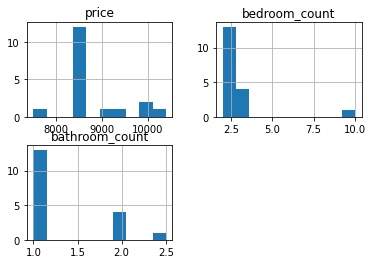

In [15]:
data.hist()

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedroom_count'}>],
       [<AxesSubplot:title={'center':'bathroom_count'}>, <AxesSubplot:>]],
      dtype=object)

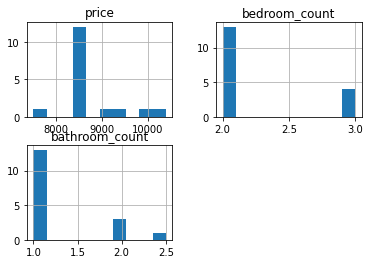

In [30]:
data.where(is_outlier(data['bedroom_count']) & is_outlier(data['bathroom_count']) & is_outlier(data['price'])).hist()

In [28]:
is_outlier(data['bedroom_count']) & is_outlier(data['bathroom_count'])

index
0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17    False
dtype: bool

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


sub_data = data[['bedroom_count', 'bathroom_count', 'price']]
max_cluster = 10
sil_graph = {}
for cluster in range(2, max_cluster + 1):
    kmeans = KMeans(n_clusters=cluster, random_state=0).fit(sub_data)
    sil_graph[cluster] = silhouette_score(sub_data, kmeans.labels_)

In [12]:
sil_graph

{2: 0.8156050998950195,
 3: 0.8103191779285464,
 4: 0.754962590973276,
 5: 0.7436620997525926,
 6: 0.7758334821706758,
 7: 0.6666666666666666,
 8: 0.6666666666666666,
 9: 0.6666666666666666,
 10: 0.6666666666666666}

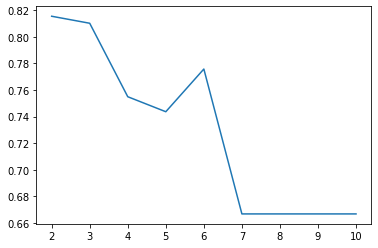

In [17]:
import matplotlib.pyplot as plt
plt.plot(*zip(*sil_graph.items()))

In [9]:
# Choosing decided cluster level
cluster_level = 3
# Initialising cluster level
kmeans = KMeans(n_clusters=cluster_level, random_state=0).fit(sub_data)
# Assign cluster labels
cluster_label = kmeans.labels_

In [10]:
kmeans

KMeans(n_clusters=3, random_state=0)